In [ ]:
#IDENTITAS PENULIS
#NAMA : DANIEL PARULIAN NAINGGOLAN

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
pip install split-folders

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
import splitfolders

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output=base_dir, ratio=(.6, .4))
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


Copying files: 2188 files [00:00, 2810.42 files/s]


In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/train')

['paper', 'scissors', 'rock']

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/val')

['paper', 'scissors', 'rock']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori ruangan berantakan pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori ruangan rapi pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 54s - loss: 1.0944 - accuracy: 0.4075 - val_loss: 0.8605 - val_accuracy: 0.5688
Epoch 2/25
25/25 - 54s - loss: 0.7689 - accuracy: 0.6762 - val_loss: 0.5195 - val_accuracy: 0.8250
Epoch 3/25
25/25 - 55s - loss: 0.3862 - accuracy: 0.8625 - val_loss: 0.3813 - val_accuracy: 0.8750
Epoch 4/25
25/25 - 56s - loss: 0.2791 - accuracy: 0.9025 - val_loss: 0.2997 - val_accuracy: 0.9187
Epoch 5/25
25/25 - 56s - loss: 0.2295 - accuracy: 0.9250 - val_loss: 0.2726 - val_accuracy: 0.9187
Epoch 6/25
25/25 - 55s - loss: 0.1788 - accuracy: 0.9413 - val_loss: 0.1209 - val_accuracy: 0.9500
Epoch 7/25
25/25 - 54s - loss: 0.1684 - accuracy: 0.9388 - val_loss: 0.1315 - val_accuracy: 0.9688
Epoch 8/25
25/25 - 56s - loss: 0.0798 - accuracy: 0.9700 - val_loss: 0.0632 - val_accuracy: 0.9750
Epoch 9/25
25/25 - 56s - loss: 0.1281 - accuracy: 0.9575 - val_loss: 0.1638 - val_accuracy: 0.9500
Epoch 10/25
25/25 - 55s - loss: 0.1293 - accuracy: 0.9600 - val_loss: 0.1422 - val_accuracy: 0.9563
Epoch 11/

Saving WhatsApp Image 2021-07-04 at 23.53.22.jpeg to WhatsApp Image 2021-07-04 at 23.53.22 (2).jpeg
WhatsApp Image 2021-07-04 at 23.53.22.jpeg
ROCK


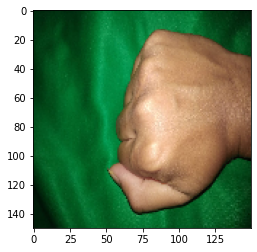

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('PAPER')
  elif classes[0][1]==1:
    print('ROCK')
  elif classes[0][2]==1:
    print('SCRISSORS')
  else:
    print('DEFAULT')